# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

Our client is a **used car dealership** that wants to maximize profits by better understanding
what factors influence the price of a used car.

### For the dealership, they would like:
- Help with pricing strategy by knowing when they can charge more.
- Information on inventory acquisition knowing which cars to prioritize buying).  
- Improvement in marketing by highlighting features customers value most.  

### Goal
To identify **key drivers of used car prices** and translate them into **actionable recommendations**
that the dealership can use immediately.

We are using a reduced data set of 426K cars for speed of processing instead of the original data set of 3M cars.

We have a constraint of computational resources, which is why we are performing analysis on a subset of the original data set. For this analysis, we will be using google colab.

### Data Mining Goal
Determine which features of used cars result in affect the prices of cars.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
#from google.colab import drive
#drive.mount("content/")
#%cd "content/MyDrive/practical_application_II_starter"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

In [ ]:
vehicles = pd.read_csv("data/vehicles.csv")
vehicles.head(1)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az


In [ ]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

id, price, year, and odometer are numerical columns.
The rest are categorical columns.

In [ ]:
vehicles.describe().apply(lambda s: s.apply('{:.2f}'.format))

,id,price,year,odometer
count,426880.00,426880.00,425675.00,422480.00
mean,7311486634.22,75199.03,2011.24,98043.33
std,4473170.41,12182282.17,9.45,213881.50
min,7207408119.00,0.00,1900.00,0.00
25%,7308143339.25,5900.00,2008.00,37704.00
50%,7312620821.00,13950.00,2013.00,85548.00
75%,7315253543.50,26485.75,2017.00,133542.50
max,7317101084.00,3736928711.00,2022.00,10000000.00


The size feature has over 70% of its data missing. So, it makes sense to remove this column. Otherwise, the rest of the features, we could impute them

In [ ]:
vehicles_na = pd.concat( (vehicles.isna().sum() , round((vehicles.isna().sum() / len(vehicles))*100, 1) ), axis=1)
vehicles_na.columns = ['# NA', '% NA']
vehicles_na.sort_values(by='% NA', ascending=False).head(10)

,# NA,% NA
size,306361,71.8
cylinders,177678,41.6
condition,174104,40.8
VIN,161042,37.7
drive,130567,30.6
paint_color,130203,30.5
type,92858,21.8
manufacturer,17646,4.1
title_status,8242,1.9
model,5277,1.2


In [ ]:
vehicles.duplicated().sum()

np.int64(0)

You can see that model and region have a lot of categories. It would not be feasible to one-hot encode these categorical features.

In [ ]:
vehicles.nunique().sort_values(ascending=False)

,0
id,426880
VIN,118246
odometer,104870
model,29649
price,15655
region,404
year,114
state,51
manufacturer,42
type,13


A significant amount of the data - 7.7% - is of $0 price.

In [ ]:
prices = pd.concat((vehicles['price'].value_counts(), (vehicles['price'].value_counts() / len(vehicles['price'])*100)), axis=1)
prices.columns = ['count', '%']
prices

,count,%
price,,
0,32895,7.705913
6995,3169,0.742363
7995,3129,0.732993
9995,2867,0.671617
8995,2837,0.664590
...,...,...
118300,1,0.000234
19782,1,0.000234
16290,1,0.000234


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

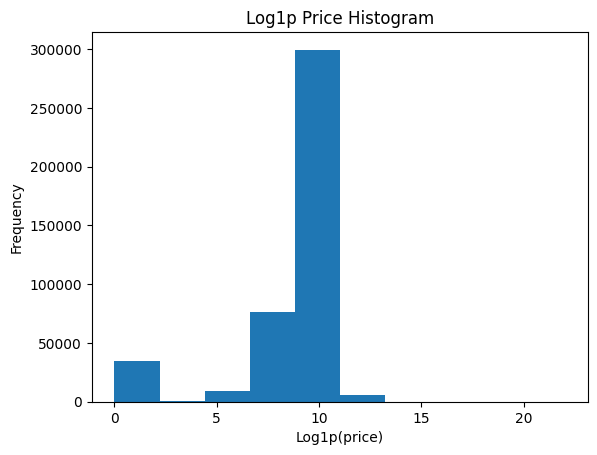

In [ ]:
np.log1p(vehicles['price']).plot(kind='hist')
plt.title('Log1p Price Histogram')
plt.xlabel('Log1p(price)')
plt.show()

In [ ]:
log1p_prices = pd.concat((np.log1p(vehicles['price']).value_counts(), (np.log1p(vehicles['price']).value_counts() / len(np.log1p(vehicles['price']))*100)), axis=1)
log1p_prices.columns = ['count', '%']
log1p_prices.index.name = 'log1p(price)'
log1p_prices.reset_index().sort_values(by='log1p(price)')

,log1p(price),count,%
0,0.000000,32895,7.705913
22,0.693147,1951,0.457037
2197,1.098612,13,0.003045
2745,1.386294,9,0.002108
4821,1.609438,4,0.000937
...,...,...,...
12908,20.933987,1,0.000234
14787,21.066902,1,0.000234
14258,21.825056,1,0.000234
8599,21.830158,2,0.000469


In [ ]:
def num_outliers(data):
  Q1 = data.quantile(.25)
  Q3 = data.quantile(.75)
  IQR = Q3 - Q1
  outlier_condition = (data < (Q1-1.5*IQR) ) | (data > (Q3+1.5*IQR) )
  outliers = data[outlier_condition]
  low_outliers, high_outliers = data[(data < (Q1-1.5*IQR) )], data[(data > (Q3+1.5*IQR) )]
  print("Total % outliers: ", len(outliers), " %: ", (len(outliers)/len(data))*100)
  print("Low % outliers: ", len(low_outliers) , " %: ", (len(low_outliers)/len(data))*100)
  print("High % outliers: ", len(high_outliers) , " %: ", (len(high_outliers)/len(data))*100)
  return low_outliers, high_outliers

With log1p(price), there is 10% of low outliers. 7.7% of these are zero price.

In [ ]:
logprice_low_outliers, logprice_high_outliers = num_outliers(np.log1p(vehicles['price']))

outliers_df = pd.concat( (logprice_low_outliers.value_counts()  , (100*logprice_low_outliers.value_counts())/len(vehicles) ), axis=1)
outliers_df.columns = ['count', '%']
outliers_df.index.name = 'log1p(price)'
outliers_df.sort_values(by='%', ascending=False)

Total % outliers:  44152  %:  10.34295352323838
Low % outliers:  44057  %:  10.320699025487256
High % outliers:  95  %:  0.02225449775112444


,count,%
log1p(price),,
0.000000,32895,7.705913
0.693147,1951,0.457037
6.216606,1021,0.239177
4.605170,815,0.190920
5.298317,274,0.064187
...,...,...
6.333280,1,0.000234
4.634729,1,0.000234
3.465736,1,0.000234


Odometer and Age/Year are also skewed

Text(0.5, 1.0, 'Odometer')

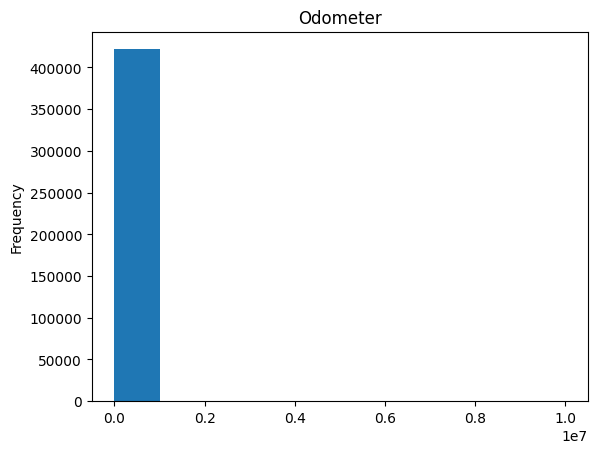

In [ ]:
vehicles['odometer'].plot(kind='hist')
plt.title("Odometer")

Text(0.5, 1.0, 'Log1p Odometer')

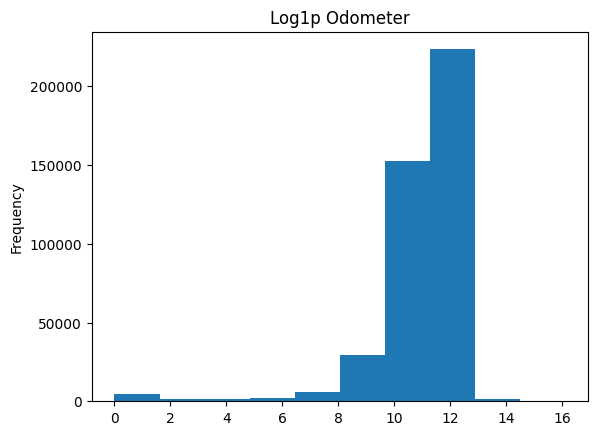

In [ ]:
np.log1p(vehicles['odometer']).plot(kind='hist')
plt.title("Log1p Odometer")

In [ ]:
logodometer_low_outliers, logodometer_high_outliers = num_outliers(np.log1p(vehicles['odometer']))

outliers_df = pd.concat( (logodometer_low_outliers.value_counts()  , (100*logodometer_low_outliers.value_counts())/len(vehicles) ), axis=1)
outliers_df.columns = ['count', '%']
outliers_df.index.name = 'log1p(odometer)'
outliers_df.sort_values(by='%', ascending=False)

Total % outliers:  20998  %:  4.918946776611694
Low % outliers:  20065  %:  4.700384182908546
High % outliers:  933  %:  0.21856259370314843


,count,%
log1p(odometer),,
0.693147,2246,0.526143
0.000000,1965,0.460317
6.908755,683,0.159998
2.397895,413,0.096749
4.615121,334,0.078242
...,...,...
6.113682,1,0.000234
8.304495,1,0.000234
8.398860,1,0.000234


Text(0.5, 1.0, 'Age')

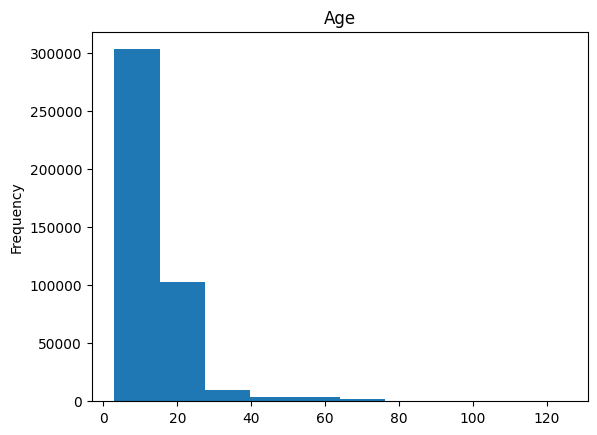

In [ ]:
age = 2025 - vehicles['year']
age.plot(kind='hist')
plt.title("Age")

Text(0.5, 1.0, 'Log1p Age')

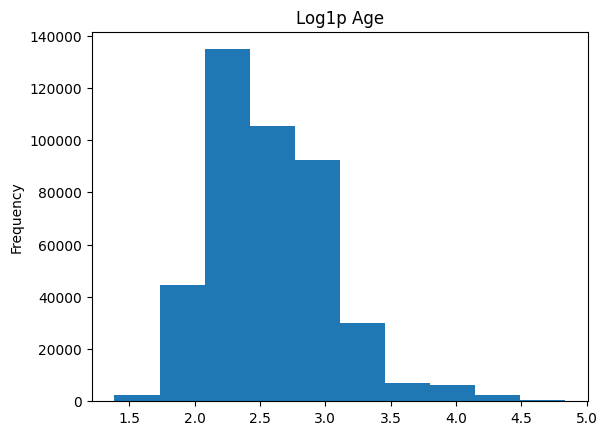

In [ ]:
np.log1p(age).plot(kind='hist')
plt.title("Log1p Age")

In [ ]:
logage_low_outliers, logage_high_outliers = num_outliers(np.log1p(age))

outliers_df = pd.concat( (logage_high_outliers.value_counts()  , (100*logage_high_outliers.value_counts())/len(vehicles) ), axis=1)
outliers_df.columns = ['count', '%']
outliers_df.index.name = 'log1p(age)'
outliers_df.sort_values(by='%', ascending=False)

Total % outliers:  7166  %:  1.678691904047976
Low % outliers:  0  %:  0.0
High % outliers:  7166  %:  1.678691904047976


,count,%
log1p(age),,
4.060443,425,0.099560
4.094345,424,0.099325
4.043051,409,0.095811
3.988984,409,0.095811
4.110874,365,0.085504
...,...,...
4.682131,1,0.000234
4.795791,1,0.000234
4.820282,1,0.000234


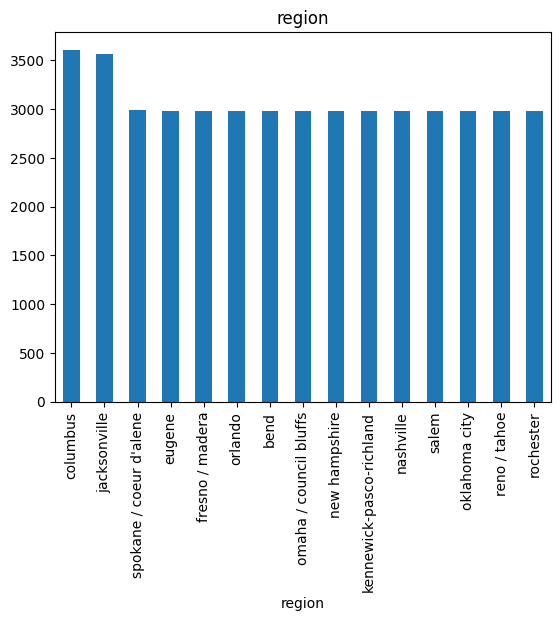

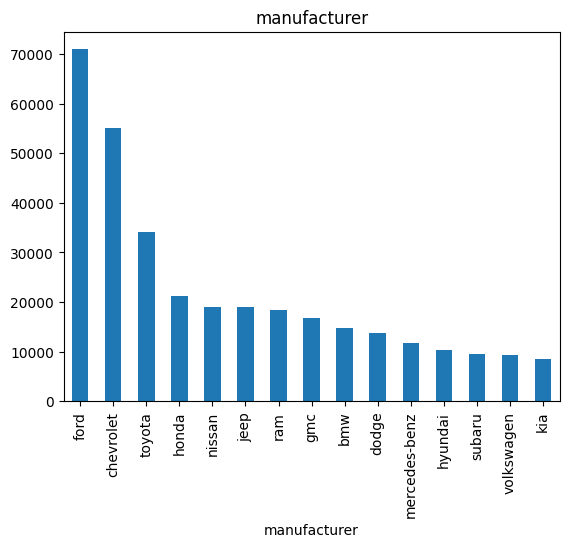

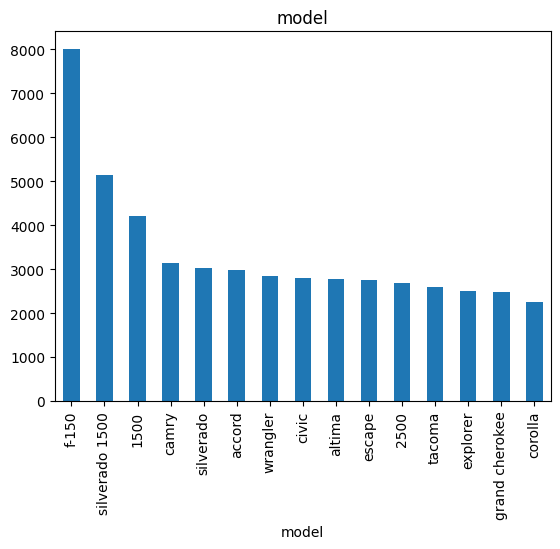

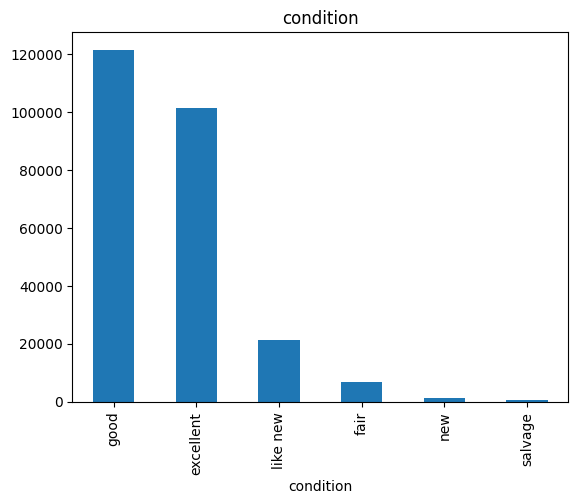

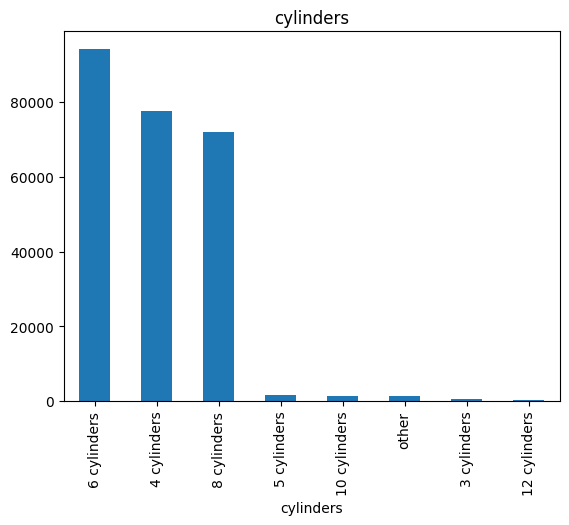

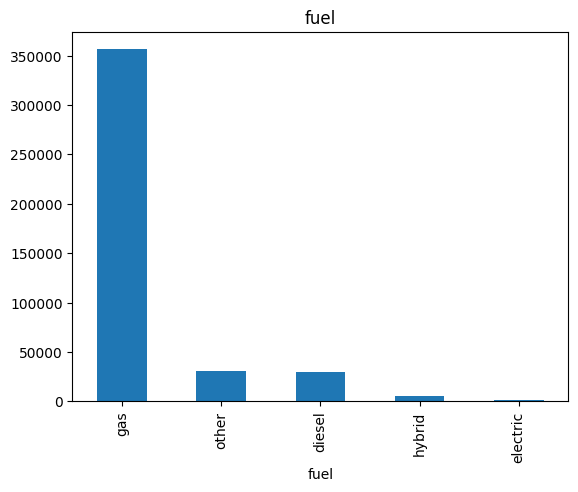

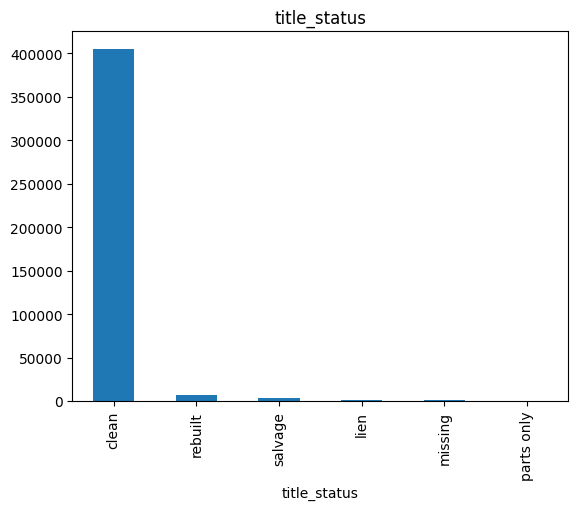

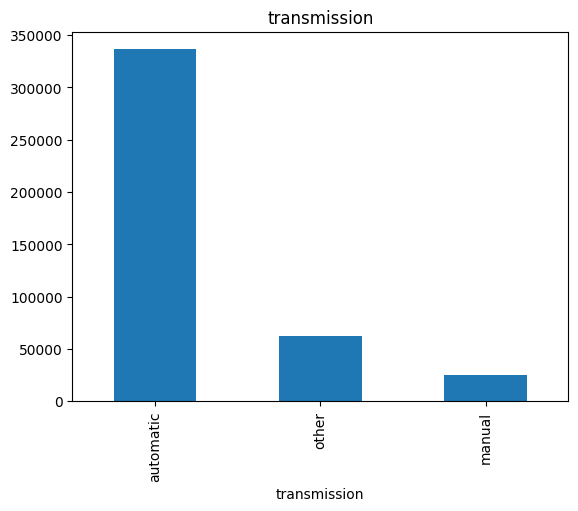

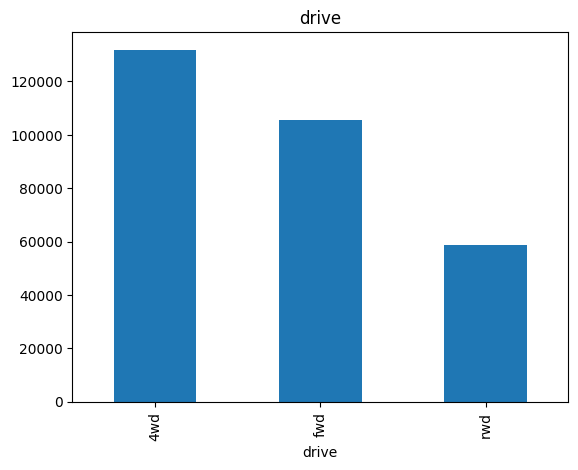

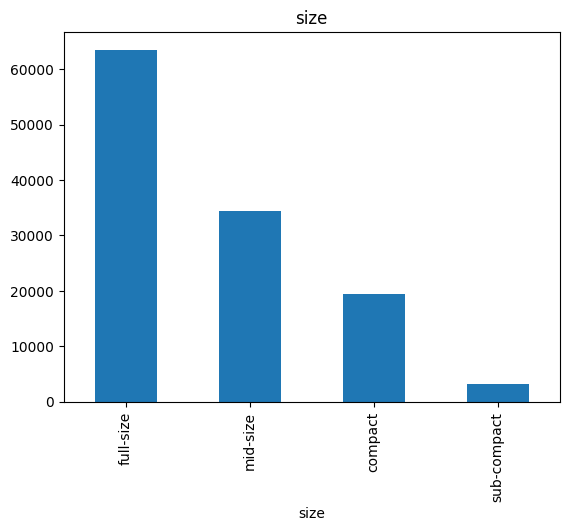

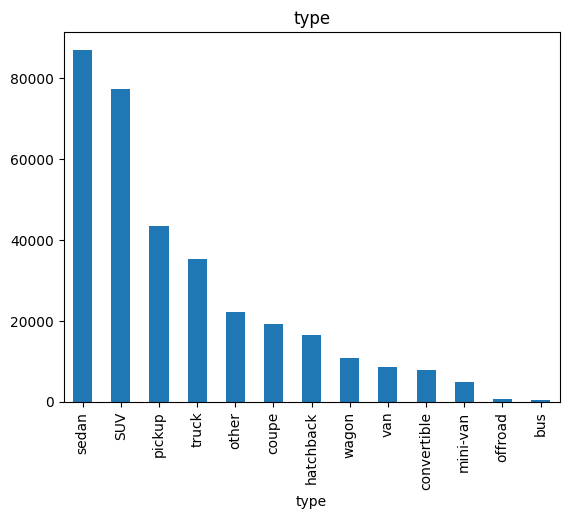

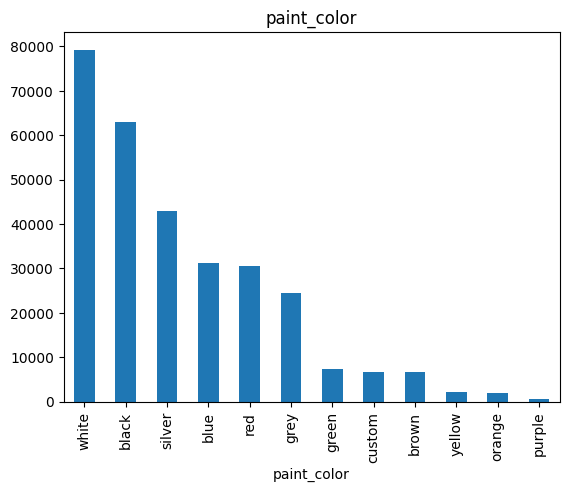

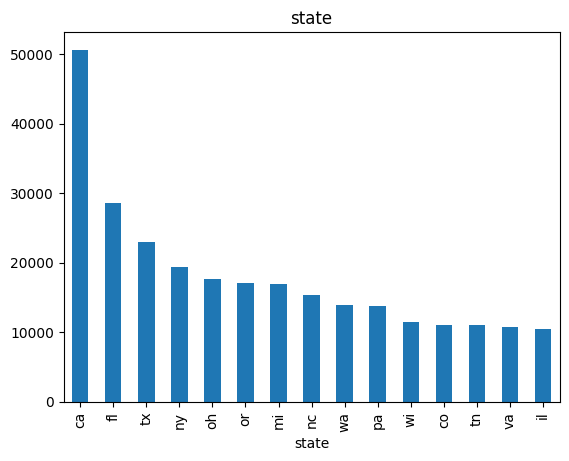

In [ ]:
for col in ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']:
  vehicles[col].value_counts().head(15).plot(kind='bar')
  plt.title(col)
  plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [ ]:
! pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.compose import TransformedTargetRegressor
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
import category_encoders as ce
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize, mquantiles
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.inspection import permutation_importance

In [ ]:
vehicles = pd.read_csv("data/vehicles.csv")
vehicles.head(1)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az


* Drop VIN since not relevant.
* Size has over 70% null and is not reliable.
* Age represents same information as year so will drop year.

In [ ]:
vehicles.index = vehicles['id']
vehicles['age'] = 2025 - vehicles['year']
vehicles.drop(columns=['id', 'year', 'VIN', 'size'], inplace=True)

In [ ]:
nonzero_price_vehicles = vehicles[ vehicles['price'] != 0]

In [ ]:
X = nonzero_price_vehicles.drop(columns=['price'])
y = nonzero_price_vehicles['price']

To avoid dropping extreme values, I tried first windsorizing the bottom and top 0.02 percentile. Next, I tried dropping the extreme outliers at .02 percentile. I ran a LASSO regression for both and found dropping the extreme outliers to have higher performance. Overall, each of the three variables take up less than 2% each of the data set


# Descriptive and Inferential Statistics

Here we interpret results in plain language:  
- **Descriptive statistics**: Summarize what the data looks like (averages, distributions, spreads).  
- **Inferential statistics**: Help us test hypotheses and generalize findings beyond our dataset.  

### Key Example
- If we find that, on average, cars with automatic transmissions sell for \$2,000 more than manual ones,  
we can infer that transmission type plays an important role in price.  

> These insights help bridge the gap between numbers and business decisions.


In [ ]:
def winsorize_with_summary(X, y=None, numeric_cols=[], limits=(0.02, 0.02)):
    X_winsorized = X.copy()
    summary = {}

    lower_q, upper_q = limits[0], 1 - limits[1]

    # Winsorize numeric features
    for col in numeric_cols:
        original = X[col].copy()
        lower_val, upper_val = mquantiles(X[col], [lower_q, upper_q])
        X_winsorized[col] = winsorize(X[col], limits=limits)
        n_lower = (original < X_winsorized[col]).sum()
        n_upper = (original > X_winsorized[col]).sum()
        total = len(X[col])
        summary[col] = {
            "lower_cap_value": lower_val,
            "upper_cap_value": upper_val,
            "lower_capped_count": n_lower,
            "upper_capped_count": n_upper,
            "lower_capped_%": n_lower / total * 100,
            "upper_capped_%": n_upper / total * 100
        }

    # Winsorize target variable if provided
    y_winsorized = None
    if y is not None:
        original_y = y.copy()
        lower_val, upper_val = mquantiles(y, [lower_q, upper_q])
        y_winsorized = winsorize(y, limits=limits)
        n_lower = (original_y < y_winsorized).sum()
        n_upper = (original_y > y_winsorized).sum()
        total = len(y)
        summary["target"] = {
            "lower_cap_value": lower_val,
            "upper_cap_value": upper_val,
            "lower_capped_count": n_lower,
            "upper_capped_count": n_upper,
            "lower_capped_%": n_lower / total * 100,
            "upper_capped_%": n_upper / total * 100
        }

    summary_df = pd.DataFrame(summary).T
    return X_winsorized, y_winsorized, summary_df

numeric_cols_to_winsorize = ['odometer', 'age']
X_winsorized, y_winsorized, summary_df = winsorize_with_summary(
    X, y, numeric_cols=numeric_cols_to_winsorize, limits=(0.02, 0.02)
)

print(summary_df)


          lower_cap_value  upper_cap_value  lower_capped_count  \
odometer            622.0         260000.0              7845.0   
age                   5.0             51.0              2078.0   
target              396.0          57995.0              7865.0   

          upper_capped_count  lower_capped_%  upper_capped_%  
odometer              5525.0        1.991193        1.402338  
age                   6531.0        0.527431        1.657677  
target                7861.0        1.996269        1.995254  


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_winsorized, y_winsorized, test_size=0.2, random_state=42)

In [ ]:
numeric_features = ["odometer", "age"]
low_card_cat = ["manufacturer", 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
high_card_cat = ["model", 'region']

For categorical features with low cardinality, I was able to one hot encode them. It would be too computationally expensive to one hot encode "model" and "region", so I used target encoding.

Both odometer and age are skewed, so I used log1p transformation. I also used log1p transformation for the target price since it is also skewed.

In [ ]:
log_transformer = FunctionTransformer(np.log1p, validate=False)

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("log1p", log_transformer)
])

low_categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
])

high_categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("target_enc", ce.TargetEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("low_cat", low_categorical_transformer, low_card_cat)
   ]
)

In [ ]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("lasso", Lasso(alpha=0.0005, max_iter=5000, random_state=42))
])

model = TransformedTargetRegressor(
    regressor=pipeline,
    func=np.log1p,
    inverse_func=np.expm1
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="neg_root_mean_squared_error")
print("CV RMSE:", -cv_scores.mean())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

lasso_coef = model.regressor_.named_steps['lasso'].coef_
print("Number of selected features:", np.sum(lasso_coef != 0))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:,.2f}")
print(f"Test RMSE: {rmse:,.2f}")
print(f"Test MAE: {mae:,.2f}")
print(f"Test R^2: {r2:.4f}")

CV RMSE: 9843.730262289882
Number of selected features: 114
Test MSE: 97,677,368.39
Test RMSE: 9,883.19
Test MAE: 6,647.11
Test R^2: 0.4913


In [ ]:
def remove_outliers_with_summary(X, y=None, numeric_cols=[], limits=(0.02, 0.02)):
    X_filtered = X.copy()
    y_filtered = y.copy() if y is not None else None
    total_rows = len(X)
    mask = np.ones(total_rows, dtype=bool)
    summary = {}

    for col in numeric_cols:
        # Compute quantiles ignoring NaNs
        lower_val, upper_val = np.nanquantile(X[col], [limits[0], 1 - limits[1]])
        lower_mask = X[col] < lower_val
        upper_mask = X[col] > upper_val

        summary[col] = {
            "lower_bound": lower_val,
            "upper_bound": upper_val,
            "lower_removed_count": lower_mask.sum(),
            "upper_removed_count": upper_mask.sum(),
            "lower_removed_%": lower_mask.sum() / total_rows * 100,
            "upper_removed_%": upper_mask.sum() / total_rows * 100
        }

        mask &= ~lower_mask & ~upper_mask

    if y is not None:
        lower_val, upper_val = np.nanquantile(y, [limits[0], 1 - limits[1]])
        lower_mask = y < lower_val
        upper_mask = y > upper_val

        summary["target"] = {
            "lower_bound": lower_val,
            "upper_bound": upper_val,
            "lower_removed_count": lower_mask.sum(),
            "upper_removed_count": upper_mask.sum(),
            "lower_removed_%": lower_mask.sum() / total_rows * 100,
            "upper_removed_%": upper_mask.sum() / total_rows * 100
        }

        mask &= ~lower_mask & ~upper_mask

    X_filtered = X_filtered[mask]
    if y is not None:
        y_filtered = y_filtered[mask]

    summary_df = pd.DataFrame(summary).T
    return X_filtered, y_filtered, summary_df

numeric_cols_to_check = ['odometer', 'age']
X_removed, y_removed, summary_df_removed = remove_outliers_with_summary(X, y, numeric_cols=numeric_cols_to_check, limits=(0.02, 0.02)
)

print(summary_df_removed)

          lower_bound  upper_bound  lower_removed_count  upper_removed_count  \
odometer       607.88    244980.36               7834.0               7834.0   
age              5.00        46.00               2078.0               7839.0   
target         396.00     57995.00               7865.0               7861.0   

          lower_removed_%  upper_removed_%  
odometer         1.988401         1.988401  
age              0.527431         1.989670  
target           1.996269         1.995254  


In [ ]:
X_train_removed, X_test_removed, y_train_removed, y_test_removed = train_test_split(X_removed, y_removed, test_size=0.2, random_state=42)

In [ ]:
model = TransformedTargetRegressor(
    regressor=pipeline,
    func=np.log1p,
    inverse_func=np.expm1
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train_removed, y_train_removed, cv=kf, scoring="neg_root_mean_squared_error")
print("CV RMSE:", -cv_scores.mean())

model.fit(X_train_removed, y_train_removed)
y_pred = model.predict(X_test_removed)

lasso_coef = model.regressor_.named_steps['lasso'].coef_
print("Number of selected features:", np.sum(lasso_coef != 0))

mse = mean_squared_error(y_test_removed, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_removed, y_pred)
r2 = r2_score(y_test_removed, y_pred)

print(f"Test MSE: {mse:,.2f}")
print(f"Test RMSE: {rmse:,.2f}")
print(f"Test MAE: {mae:,.2f}")
print(f"Test R^2: {r2:.4f}")

CV RMSE: 8118.978719744702
Number of selected features: 102
Test MSE: 65,563,034.37
Test RMSE: 8,097.10
Test MAE: 5,356.23
Test R^2: 0.5859


LASSO with the removed extreme outliers had a higher accuracy overall.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Ridge regression of all the features yields 0.589 R^2 or 8,062 MSE.

In [ ]:
pipeline_ridge = Pipeline([
    ("preprocessor", preprocessor),
    ("ridge", Ridge(alpha=1.0, max_iter=5000, random_state=42))
])

model_ridge = TransformedTargetRegressor(
    regressor=pipeline_ridge,
    func=np.log1p,
    inverse_func=np.expm1
)

cv_scores_ridge = cross_val_score(model_ridge, X_train_removed, y_train_removed, cv=kf, scoring="neg_root_mean_squared_error")
print("Ridge CV RMSE:", -cv_scores_ridge.mean())

model_ridge.fit(X_train_removed, y_train_removed)
y_pred_ridge = model_ridge.predict(X_test_removed)

mse = mean_squared_error(y_test_removed, y_pred_ridge)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_removed, y_pred_ridge)
r2 = r2_score(y_test_removed, y_pred_ridge)

print(f"Test MSE: {mse:,.2f}")
print(f"Test RMSE: {rmse:,.2f}")
print(f"Test MAE: {mae:,.2f}")
print(f"Test R^2: {r2:.4f}")

Ridge CV RMSE: 8095.686780922479
Test MSE: 64,992,896.89
Test RMSE: 8,061.82
Test MAE: 5,330.55
Test R^2: 0.5895


I used GridSearchCV to tune different values of LASSO. The smaller the alpha, the better the accuracy but also an increased number of features.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "lasso__alpha": [1e-4, 5e-4, 1e-3, 5e-3, 1e-2]
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=kf,
    n_jobs=-1
)

model_grid = TransformedTargetRegressor(
    regressor=grid_search,
    func=np.log1p,
    inverse_func=np.expm1
)

model_grid.fit(X_train_removed, y_train_removed)

print("Best alpha:", model_grid.regressor_.best_params_)
print("Best CV RMSE:", -model_grid.regressor_.best_score_)


Best alpha: {'lasso__alpha': 0.0001}
Best CV RMSE: 0.5684821951875854


In [ ]:
grid = model_grid.regressor_  # this is the GridSearchCV object

results_df = pd.DataFrame({
    'alpha': grid.cv_results_['param_lasso__alpha'].data,
    'mean_cv_rmse': -grid.cv_results_['mean_test_score'],  # negative because scoring is neg_root_mean_squared_error
})

non_zero_features = []

for alpha in grid.cv_results_['param_lasso__alpha']:
    temp_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("lasso", Lasso(alpha=float(alpha), max_iter=5000, random_state=42))
    ])
    temp_model = TransformedTargetRegressor(
        regressor=temp_pipeline,
        func=np.log1p,
        inverse_func=np.expm1
    )
    temp_model.fit(X_train_removed, y_train_removed)
    coef = temp_model.regressor_.named_steps['lasso'].coef_
    non_zero_features.append(np.sum(coef != 0))

results_df['non_zero_features'] = non_zero_features
results_df = results_df.sort_values(by='mean_cv_rmse')
print(results_df)


    alpha  mean_cv_rmse  non_zero_features
0  0.0001      0.568482                137
1  0.0005      0.571138                102
2  0.0010      0.575108                 83
3  0.0050      0.593108                 30
4  0.0100      0.607259                 19


In [ ]:
fine_alphas = np.array([0.001, 0.0015, 0.002, 0.003, 0.004, 0.005])
param_grid = {"lasso__alpha": fine_alphas}

grid_search_fine = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=kf,
    n_jobs=-1
)

model_grid_fine = TransformedTargetRegressor(
    regressor=grid_search_fine,
    func=np.log1p,
    inverse_func=np.expm1
)

model_grid_fine.fit(X_train_removed, y_train_removed)


TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                                                  estimator=Pipeline(steps=[('preprocessor',
                                                                             ColumnTransformer(transformers=[('num',
                                                                                                              Pipeline(steps=[('imputer',
                                                                                                                               SimpleImputer(strategy='median')),
                                                                                                                              ('log1p',
                                                                                                                               FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                                              ['odome...
                                                                                                                              ('onehot',
                                                                                                                               OneHotEncoder(handle_unknown='ignore'))]),
                                                                                                              ['manufacturer',
                                                                                                               'condition',
                                                                                                               'cylinders',
                                                                                                               'fuel',
                                                                                                               'title_status',
                                                                                                               'transmission',
                                                                                                               'drive',
                                                                                                               'type',
                                                                                                               'paint_color',
                                                                                                               'state'])])),
                                                                            ('lasso',
                                                                             Lasso(alpha=0.0005,
                                                                                   max_iter=5000,
                                                                                   random_state=42))]),
                                                  n_jobs=-1,
                                                  param_grid={'lasso__alpha': array([0.001 , 0.0015, 0.002 , 0.003 , 0.004 , 0.005 ])},
                                                  scoring='neg_root_mean_squared_error'))

In [ ]:
print("Best alpha:", model_grid.regressor_.best_params_)
print("Best CV RMSE:", -model_grid.regressor_.best_score_)

Best alpha: {'lasso__alpha': 0.0001}
Best CV RMSE: 0.5684821951875854


In [ ]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("lasso", Lasso(alpha=0.0005, max_iter=5000, random_state=42))
])

grid = model_grid_fine.regressor_  # the GridSearchCV object
results = []

for alpha in fine_alphas:
    temp_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("lasso", Lasso(alpha=float(alpha), max_iter=5000, random_state=42))
    ])
    temp_model = TransformedTargetRegressor(
        regressor=temp_pipeline,
        func=np.log1p,
        inverse_func=np.expm1
    )
    temp_model.fit(X_train_removed, y_train_removed)
    coef = temp_model.regressor_.named_steps['lasso'].coef_
    non_zero = np.sum(coef != 0)
    results.append({'alpha': alpha, 'non_zero_features': non_zero})

cv_rmse = -grid.cv_results_['mean_test_score']
results_df = pd.DataFrame(results)
results_df['cv_rmse'] = cv_rmse
results_df = results_df.sort_values('cv_rmse')
print(results_df)


    alpha  non_zero_features   cv_rmse
0  0.0010                 83  0.575108
1  0.0015                 67  0.578562
2  0.0020                 54  0.581362
3  0.0030                 41  0.585446
4  0.0040                 37  0.589314
5  0.0050                 30  0.593108


I tried to incoporate polynomial features, but it did not improve accuracy.

In [ ]:
log_transformer = FunctionTransformer(np.log1p, validate=False)

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("log1p", log_transformer)
])

low_cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("low_cat", low_cat_transformer, low_card_cat)
])


class LassoFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, alpha=0.002, top_n=10):
        self.alpha = alpha
        self.top_n = top_n

    def fit(self, X, y):
        lasso = Lasso(alpha=self.alpha, max_iter=5000, random_state=42)
        lasso.fit(X, y)
        coefs = pd.Series(np.abs(lasso.coef_), index=X.columns)
        self.selected_features_ = coefs.sort_values(ascending=False).head(self.top_n).index.tolist()
        return self

    def transform(self, X):
        return X[self.selected_features_]

ridge = Ridge(alpha=1.0, random_state=42)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("to_df", FunctionTransformer(lambda X: pd.DataFrame(X))),  # keep columns
    ("lasso_select", LassoFeatureSelector(alpha=0.002, top_n=10)),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("rfe", RFE(ridge, n_features_to_select=20)),
    ("ridge", ridge)
])

model = TransformedTargetRegressor(
    regressor=full_pipeline,
    func=np.log1p,
    inverse_func=np.expm1
)


kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(
    model, X_train_removed, y_train_removed,
    cv=kf, scoring="neg_root_mean_squared_error"
)
print("CV RMSE:", -cv_scores.mean())


model.fit(X_train_removed, y_train_removed)
y_pred = model.predict(X_test_removed)

mse = mean_squared_error(y_test_removed, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_removed, y_pred)
r2 = r2_score(y_test_removed, y_pred)

print(f"Test RMSE: {rmse:.2f}, MAE: {mae:.2f}, R^2: {r2:.4f}")


CV RMSE: 8446.44680020824
Test RMSE: 8495.85, MAE: 5911.47, R^2: 0.5442


I decided to go with 54 features at alpha=0.002 and then use Recursive Feature Elimination to get a feature set of around 20 features.

I added the high dimensional categorical features, but it did not make a difference on accuracy.

In [ ]:
high_categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("target_enc", ce.TargetEncoder(smoothing=0.3))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("low_cat", low_categorical_transformer, low_card_cat),
    ("high_cat", high_categorical_transformer, high_card_cat)
])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("lasso", Lasso(alpha=0.002, max_iter=5000, random_state=42))
])

model = TransformedTargetRegressor(
    regressor=pipeline,
    func=np.log1p,
    inverse_func=np.expm1
)

log_transformer = FunctionTransformer(np.log1p, validate=False)

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("log1p", log_transformer)
])

low_categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("low_cat", low_categorical_transformer, low_card_cat)
    ]
)

lasso_selector = SelectFromModel(
    Lasso(alpha=0.002, max_iter=5000, random_state=42)
)


ridge_base = Ridge(alpha=1.0, random_state=42)
rfe = RFE(ridge_base, n_features_to_select=20)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("lasso_select", lasso_selector),   # keeps nonzero Lasso features
    ("rfe", rfe),                       # refines to top 20
    ("ridge", ridge_base)               # final ridge model
])

model = TransformedTargetRegressor(
    regressor=pipeline,
    func=np.log1p, inverse_func=np.expm1
)


kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(
    model, X_train_removed, y_train_removed,
    cv=kf, scoring="neg_root_mean_squared_error"
)
print("CV RMSE:", -cv_scores.mean())

model.fit(X_train_removed, y_train_removed)
y_pred = model.predict(X_test_removed)

mse = mean_squared_error(y_test_removed, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_removed, y_pred)
r2 = r2_score(y_test_removed, y_pred)

print(f"Test MSE: {mse:,.2f}")
print(f"Test RMSE: {rmse:,.2f}")
print(f"Test MAE: {mae:,.2f}")
print(f"Test R^2: {r2:.4f}")


CV RMSE: 8181.542379179089
Test MSE: 66,996,142.40
Test RMSE: 8,185.12
Test MAE: 5,565.56
Test R^2: 0.5769


In [ ]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("lasso", Lasso(alpha=0.002, max_iter=5000, random_state=42))
])

model = TransformedTargetRegressor(
    regressor=pipeline,
    func=np.log1p,
    inverse_func=np.expm1
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train_removed, y_train_removed, cv=kf, scoring="neg_root_mean_squared_error")
print("CV RMSE:", -cv_scores.mean())

model.fit(X_train_removed, y_train_removed)
y_pred = model.predict(X_test_removed)

lasso_coef = model.regressor_.named_steps['lasso'].coef_
print("Number of selected features:", np.sum(lasso_coef != 0))

mse = mean_squared_error(y_test_removed, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_removed, y_pred)
r2 = r2_score(y_test_removed, y_pred)

print(f"Test MSE: {mse:,.2f}")
print(f"Test RMSE: {rmse:,.2f}")
print(f"Test MAE: {mae:,.2f}")
print(f"Test R^2: {r2:.4f}")

CV RMSE: 8290.664009635351
Number of selected features: 54
Test MSE: 68,531,377.63
Test RMSE: 8,278.37
Test MAE: 5,511.41
Test R^2: 0.5672


Test RMSE: 8,185.17
Test R^2: 0.5769

In [ ]:
log_transformer = FunctionTransformer(np.log1p, validate=False)

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("log1p", log_transformer)
])

low_categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("low_cat", low_categorical_transformer, low_card_cat)
    ]
)

lasso_selector = SelectFromModel(
    Lasso(alpha=0.002, max_iter=5000, random_state=42)
)


ridge_base = Ridge(alpha=1.0, random_state=42)
rfe = RFE(ridge_base, n_features_to_select=20)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("lasso_select", lasso_selector),   # keeps nonzero Lasso features
    ("rfe", rfe),                       # refines to top 20
    ("ridge", ridge_base)               # final ridge model
])

model = TransformedTargetRegressor(
    regressor=pipeline,
    func=np.log1p, inverse_func=np.expm1
)


kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(
    model, X_train_removed, y_train_removed,
    cv=kf, scoring="neg_root_mean_squared_error"
)
print("CV RMSE:", -cv_scores.mean())

model.fit(X_train_removed, y_train_removed)
y_pred = model.predict(X_test_removed)

mse = mean_squared_error(y_test_removed, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_removed, y_pred)
r2 = r2_score(y_test_removed, y_pred)

print(f"Test MSE: {mse:,.2f}")
print(f"Test RMSE: {rmse:,.2f}")
print(f"Test MAE: {mae:,.2f}")
print(f"Test R^2: {r2:.4f}")


CV RMSE: 8181.5441706488755
Test MSE: 66,997,007.09
Test RMSE: 8,185.17
Test MAE: 5,565.62
Test R^2: 0.5769


I took the top 20 features after LASSO and RFE with Ridge and calculated polynomial features. This way, I could see if any interactions between categorical and numerical features exist and it is tractable to do so with less features.

In [ ]:
fitted_pipeline = model.regressor_

# Make a sub-pipeline up to RFE
sub_pipeline = Pipeline(steps=[
    ('preprocessor', fitted_pipeline.named_steps['preprocessor']),
    ('lasso_select', fitted_pipeline.named_steps['lasso_select']),
    ('rfe', fitted_pipeline.named_steps['rfe'])
])

X_top20 = sub_pipeline.transform(X_train_removed)  # shape = (n_samples, 20)

# Generate feature names for top 20
# Get all preprocessed feature names
numeric_features_names = numeric_features
low_cat_features_names = fitted_pipeline.named_steps['preprocessor'] \
    .named_transformers_['low_cat'] \
    .named_steps['onehot'].get_feature_names_out(low_card_cat)
all_features_preprocessed = np.concatenate([numeric_features_names, low_cat_features_names])

# Apply Lasso selector mask
lasso_mask = fitted_pipeline.named_steps['lasso_select'].get_support()
all_features_lasso_selected = np.array(all_features_preprocessed)[lasso_mask]

# Apply RFE mask
rfe_mask = fitted_pipeline.named_steps['rfe'].support_
top_features = all_features_lasso_selected[rfe_mask]

print("Top 20 features after Lasso + RFE:")
print(top_features)
print("X_top20 shape:", X_top20.shape)


Top 20 features after Lasso + RFE:
['age' 'manufacturer_audi' 'manufacturer_chrysler' 'manufacturer_dodge'
 'manufacturer_hyundai' 'manufacturer_kia' 'manufacturer_lexus'
 'manufacturer_mitsubishi' 'manufacturer_nissan' 'manufacturer_porsche'
 'condition_fair' 'cylinders_4 cylinders' 'cylinders_8 cylinders'
 'fuel_diesel' 'title_status_salvage' 'drive_4wd' 'drive_rwd'
 'type_convertible' 'type_other' 'type_pickup']
X_top20 shape: (285649, 20)


With all of the polynomial features, I was able to get RMSE of 7,263.39 or R^2 of 0.6668 which is my best model accuracy.

In [ ]:

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_top20)
poly_feature_names = poly.get_feature_names_out(top_features)

print("Shape after polynomial expansion:", X_poly.shape)


ridge_poly = Ridge(alpha=1.0, random_state=42)
ridge_poly.fit(X_poly, y_train_removed)

X_test_top20 = sub_pipeline.transform(X_test_removed)


X_test_poly = poly.transform(X_test_top20)

y_pred = ridge_poly.predict(X_test_poly)


mse = mean_squared_error(y_test_removed, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_removed, y_pred)
r2 = r2_score(y_test_removed, y_pred)

print(f"Test MSE: {mse:,.2f}")
print(f"Test RMSE: {rmse:,.2f}")
print(f"Test MAE: {mae:,.2f}")
print(f"Test R^2: {r2:.4f}")


coefs = ridge_poly.coef_
coef_df = pd.DataFrame({
    'feature': poly_feature_names,
    'coefficient': coefs,
    'direction': ['up' if c > 0 else 'down' for c in coefs],
    'magnitude': np.abs(coefs)
}).sort_values('magnitude', ascending=False)

print(coef_df.head(20))

Shape after polynomial expansion: (285649, 230)
Test MSE: 52,756,856.09
Test RMSE: 7,263.39
Test MAE: 5,100.48
Test R^2: 0.6668
                                 feature   coefficient direction     magnitude
0                                    age -61074.533065      down  61074.533065
91   manufacturer_dodge type_convertible  19550.706768        up  19550.706768
9                   manufacturer_porsche  16242.953801        up  16242.953801
164               manufacturer_porsche^2  16242.953801        up  16242.953801
139            manufacturer_mitsubishi^2 -14690.702884      down  14690.702884
7                manufacturer_mitsubishi -14690.702884      down  14690.702884
52         manufacturer_audi fuel_diesel -12943.860866      down  12943.860866
206         fuel_diesel type_convertible -12701.860612      down  12701.860612
175                     condition_fair^2 -12478.658320      down  12478.658320
10                        condition_fair -12478.658320      down  12478.658320
1  

There were too many features, so I used permutation importance to get the top 20 features. Ridge regression showed that the accuracy did not drop that much even with the top 20 features. This shows that these top 20 features capture most of the variance in the car prices.

In [ ]:
result = permutation_importance(
    ridge_poly, X_test_poly.toarray(), y_test_removed,
    n_repeats=10, random_state=42, n_jobs=-1
)

perm_df = pd.DataFrame({
    'feature': poly_feature_names,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values('importance_mean', ascending=False)

top20_features = perm_df.head(20)['feature'].values
print("Top 20 features by permutation importance:")
print(top20_features)

top20_idx = [np.where(poly_feature_names == f)[0][0] for f in top20_features]

X_train_top20 = X_poly[:, top20_idx]
X_test_top20 = X_test_poly[:, top20_idx]

ridge_top20 = Ridge(alpha=1.0, random_state=42)
ridge_top20.fit(X_train_top20, y_train_removed)

y_pred_top20 = ridge_top20.predict(X_test_top20)

mse = mean_squared_error(y_test_removed, y_pred_top20)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_removed, y_pred_top20)
r2 = r2_score(y_test_removed, y_pred_top20)

print("\nPerformance with top 20 expanded features:")
print(f"Test MSE: {mse:,.2f}")
print(f"Test RMSE: {rmse:,.2f}")
print(f"Test MAE: {mae:,.2f}")
print(f"Test R^2: {r2:.4f}")


Top 20 features by permutation importance:
['age' 'age^2' 'age drive_4wd' 'age cylinders_4 cylinders' 'drive_4wd'
 'drive_4wd^2' 'cylinders_4 cylinders^2' 'cylinders_4 cylinders'
 'age cylinders_8 cylinders' 'age manufacturer_audi' 'age condition_fair'
 'fuel_diesel' 'fuel_diesel^2' 'cylinders_8 cylinders^2'
 'cylinders_8 cylinders' 'age manufacturer_mitsubishi'
 'age manufacturer_nissan' 'age manufacturer_lexus' 'manufacturer_audi'
 'manufacturer_audi^2']

Performance with top 20 expanded features:
Test MSE: 61,786,918.77
Test RMSE: 7,860.47
Test MAE: 5,706.08
Test R^2: 0.6098


In [ ]:
perm_df.head(20)

,feature,importance_mean,importance_std
0,age,8.220955,0.028973
20,age^2,4.044706,0.020882
35,age drive_4wd,0.439831,0.001931
31,age cylinders_4 cylinders,0.332768,0.002772
15,drive_4wd,0.206974,0.001063
215,drive_4wd^2,0.206974,0.001063
185,cylinders_4 cylinders^2,0.145887,0.001376
11,cylinders_4 cylinders,0.145887,0.001376
32,age cylinders_8 cylinders,0.090018,0.000961
21,age manufacturer_audi,0.086564,0.000702


In [ ]:
# Get coefficients for the top 20 features
coef_df = pd.DataFrame({
    "feature": top20_features,
    "coefficient": ridge_top20.coef_
}).sort_values("coefficient", key=abs, ascending=False)

print("\nRidge coefficients for top 20 features:")
print(coef_df)



Ridge coefficients for top 20 features:
                        feature   coefficient
0                           age -62683.856617
19          manufacturer_audi^2  12635.797897
18            manufacturer_audi  12635.797897
7         cylinders_4 cylinders -11072.563824
6       cylinders_4 cylinders^2 -11072.563824
5                   drive_4wd^2   9137.539058
4                     drive_4wd   9137.539058
9         age manufacturer_audi  -8962.168040
1                         age^2   8497.440278
3     age cylinders_4 cylinders   6455.877403
14        cylinders_8 cylinders   6402.718244
13      cylinders_8 cylinders^2   6402.718244
11                  fuel_diesel   6242.427023
12                fuel_diesel^2   6242.427023
2                 age drive_4wd  -5676.729996
8     age cylinders_8 cylinders  -2904.692356
15  age manufacturer_mitsubishi  -2321.910230
10           age condition_fair  -1497.903558
16      age manufacturer_nissan  -1442.475420
17       age manufacturer_lexus   1250.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

From our most recent model with better accuracy, we wanted to see the coefficients to understand if there was a positive or negative impact of that feature. I also looked at permutation imputation to see how much influence did the features have on the accuracy.

/tmp/ipython-input-1514094197.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


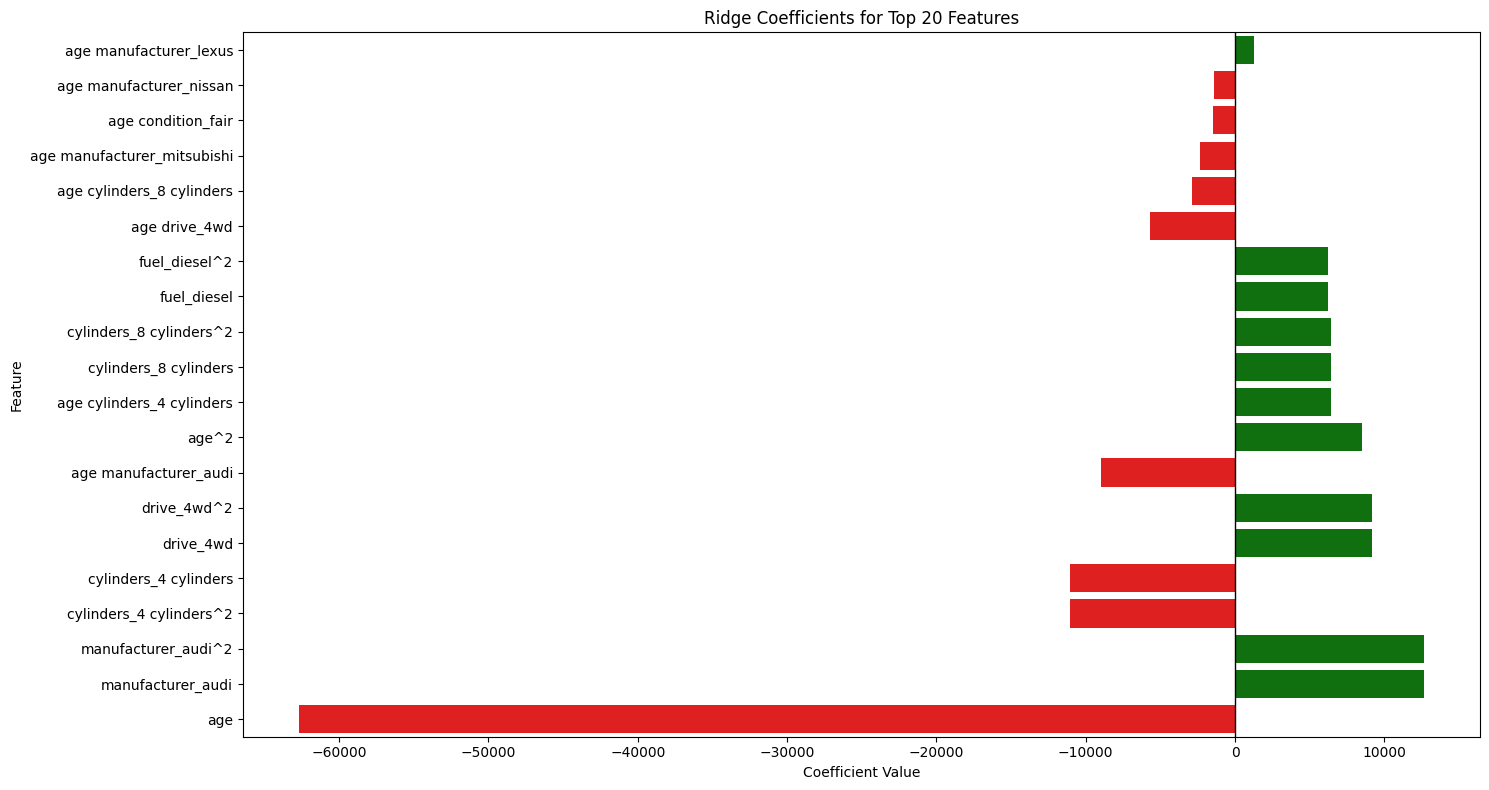

In [ ]:
import seaborn as sns

coef_df_sorted = coef_df.sort_values("coefficient", key=abs, ascending=True)

colors = ["green" if x > 0 else "red" for x in coef_df_sorted["coefficient"]]

plt.figure(figsize=(15, 8))
sns.barplot(
    x="coefficient",
    y="feature",
    data=coef_df_sorted,
    palette=colors
)


plt.axvline(0, color="black", linewidth=1)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Ridge Coefficients for Top 20 Features")
plt.tight_layout()
plt.show()



In [ ]:
result_top20 = permutation_importance(
    ridge_top20, X_test_top20.toarray(), y_test_removed,
    n_repeats=10, random_state=42, n_jobs=-1
)

importance_mean = np.ravel(result_top20.importances_mean)
importance_std = np.ravel(result_top20.importances_std)

perm_top20_df = pd.DataFrame({
    'feature': top20_features,
    'importance_mean': importance_mean,
    'importance_std': importance_std
}).sort_values('importance_mean', ascending=True)  # for horizontal barplot

y_pred_top20 = ridge_top20.predict(X_test_top20.toarray())
mse = mean_squared_error(y_test_removed, y_pred_top20)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_removed, y_pred_top20)
r2 = r2_score(y_test_removed, y_pred_top20)

print("\nPerformance with top 20 expanded features:")
print(f"Test MSE: {mse:,.2f}")
print(f"Test RMSE: {rmse:,.2f}")
print(f"Test MAE: {mae:,.2f}")
print(f"Test R^2: {r2:.4f}")


Performance with top 20 expanded features:
Test MSE: 61,786,918.77
Test RMSE: 7,860.47
Test MAE: 5,706.08
Test R^2: 0.6098


In [ ]:
perm_top20_df.sort_values('importance_mean', ascending=False)

,feature,importance_mean,importance_std
0,age,8.657058,0.029487
1,age^2,4.379575,0.023931
2,age drive_4wd,0.571779,0.002373
3,age cylinders_4 cylinders,0.549483,0.003861
6,cylinders_4 cylinders^2,0.239275,0.001638
7,cylinders_4 cylinders,0.239275,0.001638
4,drive_4wd,0.221795,0.001361
5,drive_4wd^2,0.221795,0.001361
9,age manufacturer_audi,0.114770,0.000695
8,age cylinders_8 cylinders,0.103307,0.001215


/tmp/ipython-input-1572819047.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


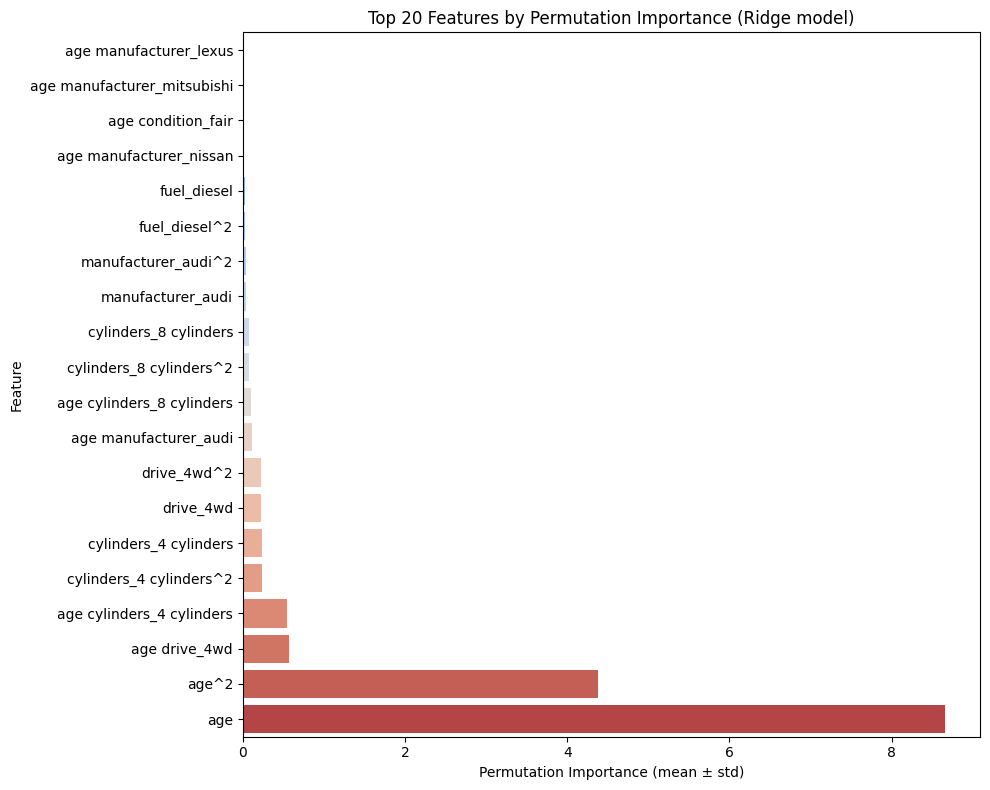

In [ ]:
perm_top20_df_sorted = perm_top20_df.sort_values('importance_mean', ascending=True)

plt.figure(figsize=(10, 8))
ax = sns.barplot(
    x='importance_mean',
    y='feature',
    data=perm_top20_df_sorted,
    palette="coolwarm"
)

plt.xlabel("Permutation Importance (mean ± std)")
plt.ylabel("Feature")
plt.title("Top 20 Features by Permutation Importance (Ridge model)")
plt.tight_layout()
plt.show()


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

**Findings**

Age is the dominant factor. Older cars generally have lower prices. The relationship is non-linear: depreciation is faster at younger ages, then slows down (captured by the age^2 term).

Vehicles with 4WD tend to have higher prices than 2WD, especially for SUVs, trucks, and higher-end vehicles. Older 4WD vehicles depreciate more slowly than 2WD vehicles, preserving value longer.

Cars with 4 or 8 cylinders tend to command higher prices depending on interactions with age and drive type.

Diesel fuel slightly increases price

Premium brands like Audi and Lexus are associated with higher prices. Brands such as Nissan and Mitsubishi are linked with lower prices. Brand effects are less influential than age but still important for pricing strategy.


**Next Steps and Recommendations**

* Prioritize younger vehicles with slower depreciation curves (captured by age^2 effects).

* Focus on 4WD vehicles, especially SUVs and trucks, as they maintain higher prices over time.

* Vehicles with 4 or 8 cylinders tend to command higher prices—consider emphasizing these in inventory.

*Brands*

* Audi and Lexus vehicles consistently sell at higher prices—consider allocating more inventory to these brands.

* Be cautious with Nissan and Mitsubishi, which tend to sell at lower prices; avoid overstocking unless the goal is fast turnover.

*Fuel Type*

* Diesel vehicles slightly increase in value—especially if paired with 4WD or high-cylinder engines.

* Use fuel type strategically for vehicles targeted at long-distance drivers or niche markets.